## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [4]:
X.shape

(178, 13)

**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [5]:
X.isnull().any().any()

False

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Получили, что все данные имеют вид вещественных чисел, а значит - нет качественных и порядковых признаков, поэтому one-hot кодирование не понадобится.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [10]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.750,3.64,380.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.180,2.69,1020.0
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.900,2.78,325.0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.130,2.93,1375.0
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.070,2.75,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.150,2.90,1320.0
50,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.120,2.91,1150.0
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.780,1.75,520.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.060,3.58,1295.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
X_train_1 = X_train[['alcohol', 'magnesium']]
X_test_1 = X_test[['alcohol', 'magnesium']]

In [13]:
normalizer = StandardScaler()
X_train_1 = normalizer.fit_transform(X_train_1)
X_test_1 = normalizer.fit_transform(X_test_1)

In [14]:
n = [1, 3, 5, 10, 15, 25]

In [15]:
dfres = pd.DataFrame(columns = ['NN', 'Train', 'Test'])
dfres.head()

,NN,Train,Test


In [16]:
x = 0
m = []
for i in n:
    clf = KNeighborsClassifier(n_neighbors=i, p = 2)
    clf.fit(X_train_1, y_train)
    m.append(clf)
    y_pred_train = clf.predict(X_train_1)
    y_pred_test = clf.predict(X_test_1)
    dfres.loc[x,'NN'] = int(i)
    dfres.loc[x,'Train'] = np.round(np.mean(y_train == y_pred_train), 2)
    dfres.loc[x,'Test'] = np.round(np.mean(y_test == y_pred_test), 2)
    x += 1
dfres.set_index('NN', inplace=True)
dfres

,Train,Test
NN,,
1,1.0,0.63
3,0.8,0.59
5,0.79,0.61
10,0.79,0.59
15,0.77,0.57
25,0.76,0.63


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [17]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [18]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

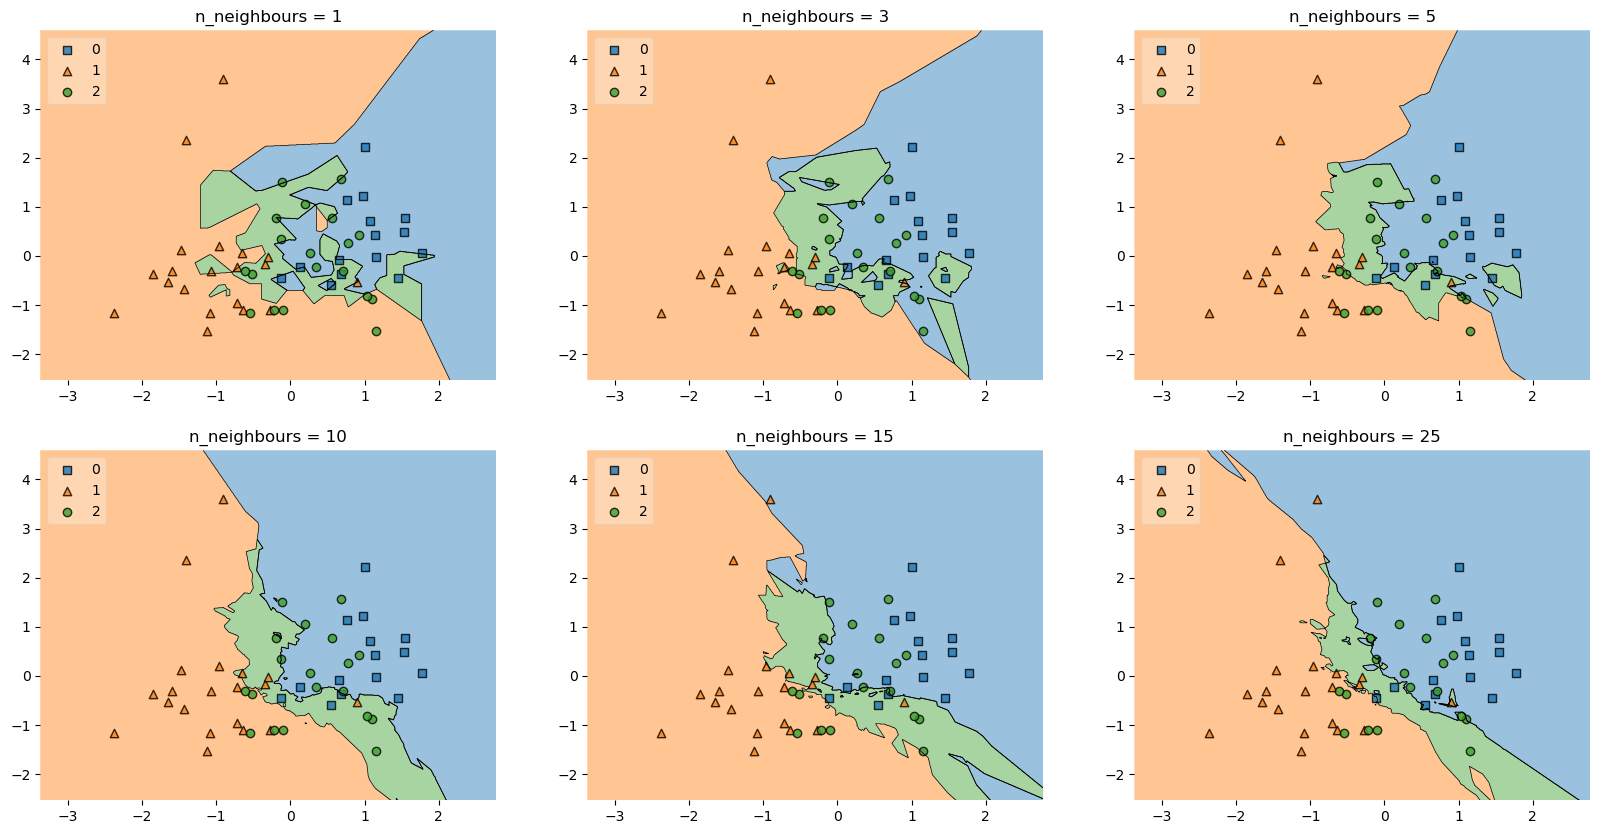

In [19]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clfs, lab, grd in zip(m,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test_1, y=y_test, clf=clfs, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Лучше всего на графиках поверхностей вышло предсказание на основании 10 соседей - наиболее гладкая поверхность и практически нет "вкраплений" другого цвета, а помимо этого хорошее соотношение правильных ответов в обучающей выборке и тестовой (около 80% для первой и 60 для второй)

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

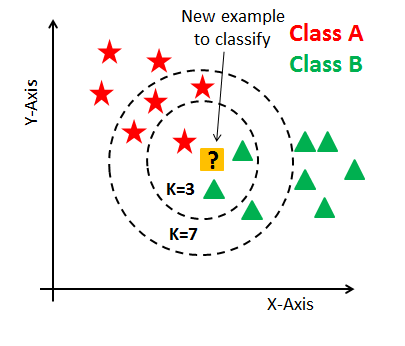

In [20]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass
    def predict(self, X):
        predicted = list()
        for i in range(len(X)):
            dist = list()
            for j in range(len(self.X_train)):
                d = np.sqrt(np.sum((X[i] - self.X_train[j]) ** 2))
                dist.append((d, self.y_train[j])) 
            dist.sort()
            dist = dist[:self.k]
            neigbors_labels = list()
            for i in dist:
                neigbors_labels.append(i[1])
            predicted.append(np.argmax(np.bincount(neigbors_labels)))
        
        return np.array(predicted)
    pass

In [21]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [22]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/juliachirkova/diamonds/main/diamonds.csv')

In [24]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [25]:
data.isnull().any().any()

False

Пропущенных значений нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [26]:
data.drop(columns='Unnamed: 0', inplace = True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [27]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего коррелируют масса в каратах, поскольку корелляция близка к 1, а далее - параметры по длина, ширина и высота, причем ширина и высота примерно одинаково.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [28]:
data = pd.get_dummies(data)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [29]:
X = data.drop(columns='price')
y = data.price

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
normalizer = StandardScaler()
X_train[['carat', 'depth', 'table', 'x', 'y', 'z']] = normalizer.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test[['carat', 'depth', 'table', 'x', 'y', 'z']] = normalizer.fit_transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [32]:
X_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
50242,-0.208023,-1.846077,3.387044,0.015521,0.098324,-0.154750,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45278,-0.503236,-0.591952,-0.659528,-0.350157,-0.326258,-0.393978,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16495,0.614356,-1.428035,0.239710,0.898500,0.834843,0.661442,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3267,-0.186936,-0.661626,-0.209909,0.060116,0.089659,0.000045,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
43906,-0.861708,0.731846,-0.209909,-1.001243,-0.932804,-0.886508,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27640,2.723020,-0.452605,-0.659528,2.289861,2.160578,2.124959,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14501,1.120435,0.453151,-1.558767,1.166070,1.155446,1.210261,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
30727,-0.988228,-0.452605,-0.659528,-1.135027,-1.088773,-1.139809,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47323,-1.199095,0.522825,0.239710,-1.616652,-1.548014,-1.519760,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X_test

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
38807,-1.027049,-0.384839,0.693171,-1.235776,-1.265896,-1.276344,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36031,-0.815843,-0.034304,0.693171,-0.888497,-0.915719,-0.901735,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
28575,-1.048170,0.947194,-0.192448,-1.307013,-1.337727,-1.233120,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
51189,-0.203347,-0.034304,1.578789,-0.024751,-0.053745,-0.037252,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10962,0.556993,-0.104411,1.578789,0.767757,0.718441,0.726375,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592,-1.048170,0.877087,-1.078066,-1.262490,-1.292833,-1.189896,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6723,-1.111531,-0.595160,-0.192448,-1.387154,-1.373643,-1.420425,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9288,0.556993,-0.735374,-0.192448,0.749948,0.790272,0.668743,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
27178,3.197063,0.386338,1.578789,2.513057,2.424432,2.527382,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [35]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
mse_train = mse(y_train, model_lr.predict(X_train))
mse_test = mse(y_test, model_lr.predict(X_test))
print('Среднеквадратичная ошибка на тренировочной выборке:', mse_train)
print('Среднеквадратичная ошибка на тестовой выборке:', mse_test)

Среднеквадратичная ошибка на тренировочной выборке: 1269940.6723443302
Среднеквадратичная ошибка на тестовой выборке: 1293021.9226119795


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [36]:
coeffs = pd.DataFrame(columns = ['feature', 'coefficient_lg', 'coefficient_lasso', 'coefficient_ridge'])
coeffs.feature = X_train.columns
coeffs.coefficient_lg = model_lr.coef_.T
coeffs

,feature,coefficient_lg,coefficient_lasso,coefficient_ridge
0,carat,5317.616052,NaN,NaN
1,depth,-91.807221,NaN,NaN
2,table,-69.393844,NaN,NaN
3,x,-1111.430394,NaN,NaN
4,y,13.329451,NaN,NaN
5,z,-33.683665,NaN,NaN
6,cut_Fair,-578.288162,NaN,NaN
7,cut_Good,-3.726912,NaN,NaN
8,cut_Ideal,245.201028,NaN,NaN
9,cut_Premium,183.366322,NaN,NaN


На порядок отличаются значения коэффициентов при carat, x, а помимо этого довольно высоки коэффициенты у переменных, которые были перекодированы с помощью one-hot кодирования.

In [37]:
model_lr.coef_

array([ 5.31761605e+03, -9.18072214e+01, -6.93938444e+01, -1.11143039e+03,
        1.33294510e+01, -3.36836651e+01, -5.78288162e+02, -3.72691209e+00,
        2.45201028e+02,  1.83366322e+02,  1.53447724e+02,  8.26358838e+02,
        6.25407552e+02,  5.57375943e+02,  3.47152071e+02, -1.43716987e+02,
       -6.34541720e+02, -1.57803570e+03, -3.74364155e+03,  1.51066504e+03,
       -1.61646304e+02, -1.11749500e+03,  7.46041448e+02,  4.41293320e+02,
        1.21014675e+03,  1.11463630e+03])

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [38]:
from sklearn.linear_model import Lasso, Ridge

In [39]:
model_lasso = Lasso(alpha = 10)
model_lasso.fit(X_train, y_train)
#вроде в задании не сказано про вывод среднеквадратичной ошибки, но я все равно на всякий случай сделаю
mse_train_lasso = mse(y_train, model_lasso.predict(X_train))
mse_test_lasso = mse(y_test, model_lasso.predict(X_test))
print('Среднеквадратичная ошибка на тренировочной выборке:', mse_train_lasso)
print('Среднеквадратичная ошибка на тестовой выборке:', mse_test_lasso)

Среднеквадратичная ошибка на тренировочной выборке: 1306777.064370952
Среднеквадратичная ошибка на тестовой выборке: 1334585.648063747


In [40]:
model_ridge = Ridge(alpha = 10)
model_ridge.fit(X_train, y_train)
mse_train_ridge = mse(y_train, model_ridge.predict(X_train))
mse_test_ridge = mse(y_test, model_ridge.predict(X_test))
print('Среднеквадратичная ошибка на тренировочной выборке:', mse_train_ridge)
print('Среднеквадратичная ошибка на тестовой выборке:', mse_test_ridge)

Среднеквадратичная ошибка на тренировочной выборке: 1270096.4584603424
Среднеквадратичная ошибка на тестовой выборке: 1293789.8810145692


In [41]:
coeffs.coefficient_lasso = model_lasso.coef_.T
coeffs.coefficient_ridge = model_ridge.coef_.T
#добавлбю столбцы с изменением в опредлеенное кол-во раз значений коэффициентов при разных признаках для большей наглядности изменений
coeffs['lasso_lg'] = coeffs.coefficient_lasso / coeffs.coefficient_lg
coeffs['ridge_lg'] = coeffs.coefficient_ridge / coeffs.coefficient_lg
coeffs

,feature,coefficient_lg,coefficient_lasso,coefficient_ridge,lasso_lg,ridge_lg
0,carat,5317.616052,4843.647788,5278.683435,0.910868,0.992679
1,depth,-91.807221,-102.071364,-90.372828,1.111801,0.984376
2,table,-69.393844,-88.714160,-69.811018,1.278415,1.006012
3,x,-1111.430394,-700.476502,-1070.237084,0.630248,0.962937
4,y,13.329451,-0.000000,10.834394,-0.000000,0.812816
5,z,-33.683665,-32.554591,-37.164665,0.966480,1.103344
6,cut_Fair,-578.288162,-431.141082,-580.304364,0.745547,1.003486
7,cut_Good,-3.726912,-42.061870,-3.941300,11.285984,1.057524
8,cut_Ideal,245.201028,75.386059,246.045914,0.307446,1.003446
9,cut_Premium,183.366322,0.000000,183.426443,0.000000,1.000328


Довольно сильно изменились только значения коэффициентов только при некоторых признаках, полученных при помощи one-hot кодирования, а при всех вещественных практически не изменились, поэтому можно сделать вывод, что в изначальной регрессии практически не было проблемы мультиколлинеарности.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [42]:
alphas = [0.1, 1, 10, 100, 200]
lasso = list()
ridge = list()
for i in alphas:
    ml1 = Lasso(alpha=i).fit(X_train, y_train)
    lasso.append(np.linalg.norm(ml1.coef_))
    ml2 = Ridge(alpha=i).fit(X_train, y_train)
    ridge.append(np.linalg.norm(ml2.coef_))

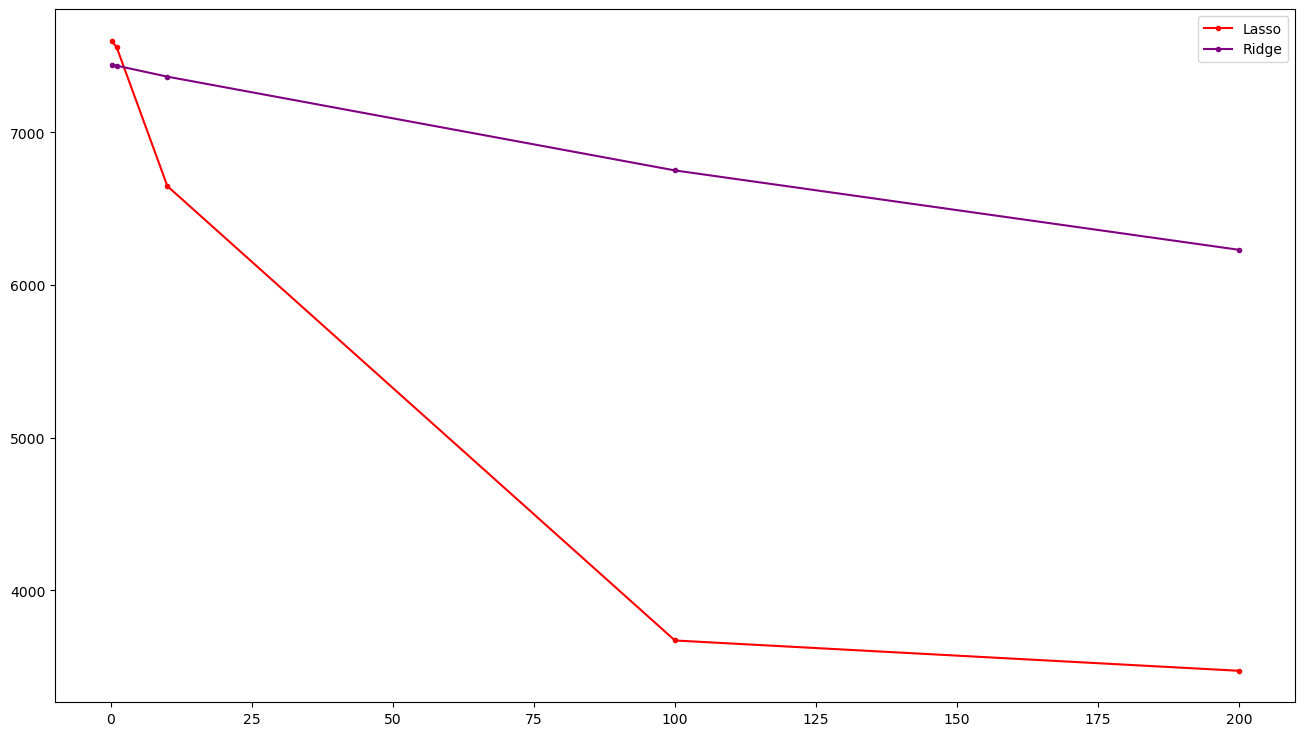

In [43]:
plt.figure(figsize=(16,9))
plt.plot(alphas, lasso, marker='.', label = 'Lasso', color ='red')
plt.plot(alphas, ridge, marker='.', label = 'Ridge', color='purple')
plt.legend()

Агрессивнее уменьшает веса Lasso, он используется чаше, поскольку этот метод зануляет веса коэффициентов при низкой важности признака для построения нашей модели.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [44]:
from sklearn.linear_model import LassoCV

In [45]:
model_lassoCV = LassoCV(alphas=alphas, cv=5)
model_lassoCV.fit(X_train, y_train)
model_lassoCV.mse_path_

array([[2381530.98530345, 2533132.18756359, 2394990.91281967,
        2409849.90435099, 2434591.37383239],
       [2170754.7762169 , 2334243.34827235, 2197116.31869259,
        2194196.62544293, 2231533.55214646],
       [1245445.8793901 , 1417628.28395987, 1276858.86248625,
        1272440.72688931, 1337939.14616428],
       [1204656.46939902, 1380140.79372652, 1241491.67600585,
        1238490.80899263, 1305639.38580403],
       [1204071.82674088, 1379969.70263406, 1241222.10529238,
        1240984.34758285, 1305553.21698712]])

In [46]:
np.mean(model_lassoCV.mse_path_, axis = 1)

array([2430819.07277402, 2225568.92415424, 1310062.57977796,
       1274083.82678561, 1274360.23984746])

In [47]:
alpha = pd.DataFrame(columns=['alphas','MSE'])
alpha.alphas = model_lassoCV.alphas_
alpha.MSE = np.mean(model_lassoCV.mse_path_, axis = 1)
alpha

,alphas,MSE
0,200.0,2.430819e+06
1,100.0,2.225569e+06
2,10.0,1.310063e+06
3,1.0,1.274084e+06
4,0.1,1.274360e+06


Судя по значениям, минимальная ошибка при alpha=1. (Около 120000)

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [48]:
ml = Lasso(alpha=1).fit(X_train, y_train)
cf = pd.DataFrame(columns = ['feature', 'coef'])
cf.feature = X_train.columns
cf.coef = ml.coef_
cf

,feature,coef
0,carat,5270.495433
1,depth,-93.223499
2,table,-71.266241
3,x,-1060.257937
4,y,0.000000
5,z,-32.139719
6,cut_Fair,-704.028705
7,cut_Good,-147.464171
8,cut_Ideal,88.303947
9,cut_Premium,23.026126


Мы можем заметить, что метод Лассо занулил три признака: средний по качеству цвет, ширину камня, и среднее (очень хорошее) качество, они являютя наименее информативными. Наибольшие отрицательные значения коэффициентов у худших качественных признаков (согласно описанию в  kaggle), а также у table. Наиболее информативным является масса в каратах, а также положительный вес у наиболее хороших качественных признаков.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [49]:
mse_ml = mse(y_test,  ml.predict(X_test))
mse_test, mse_ml

(1293021.9226119795, 1293929.2137170592)

In [50]:
(mse_ml -  mse_test)/mse_test

0.0007016826932422899

Стандартная модель (линейной регресии) работает на сотую долю процента лучше, чем Лассо-регресия, что довольно страннно? Но скорее всего, тк появившиеся признаки после one-hot кодирования действительно должны давать большой вес, а метод Лассо не позвоялет этого сделать.